# Calculating Stock Returns using Pandas DataFrames

## 1. Import Libaries and Dependencies

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## 2. Create a Path to the File Using Pathlib

In [2]:
# Use the Pathlib libary to set the path to the CSV
csv_path = Path("../Resources/MSFT.csv")

## 3. Read CSV in as DataFrame

In [3]:
# Read in the CSV as a DataFrame
msft_pd = pd.read_csv(csv_path)
msft_pd.head()

,date,close,volume,open,high,low
0,8/3/09,23.83,46843710,23.82,23.86,23.50
1,8/4/09,23.77,49116380,23.68,23.79,23.53
2,8/5/09,23.81,53263040,23.84,24.25,23.79
3,8/6/09,23.46,59655950,23.93,23.98,23.27
4,8/7/09,23.56,46165010,23.75,23.82,23.50


## 4. Drop Extra Columns

In [4]:
# Drop unnecessary columns
msft_pd.drop(columns = ['volume', 'open', 'high', 'low'], inplace=True)
msft_pd.head()

,date,close
0,8/3/09,23.83
1,8/4/09,23.77
2,8/5/09,23.81
3,8/6/09,23.46
4,8/7/09,23.56


## 5. Set Date as Index

In [5]:
# Set the date as the index to the DataFrame
msft_pd.set_index(pd.to_datetime(msft_pd["date"], infer_datetime_format = True),inplace = True)
msft_pd.head()

,date,close
date,,
2009-08-03,8/3/09,23.83
2009-08-04,8/4/09,23.77
2009-08-05,8/5/09,23.81
2009-08-06,8/6/09,23.46
2009-08-07,8/7/09,23.56


## 6. Drop Extra Date Column

In [6]:
# Drop the extra date column
msft_pd.drop('date', axis=1, inplace=True)
msft_pd.head()

,close
date,
2009-08-03,23.83
2009-08-04,23.77
2009-08-05,23.81
2009-08-06,23.46
2009-08-07,23.56


## 7. Plot Daily Close

<AxesSubplot:xlabel='date'>

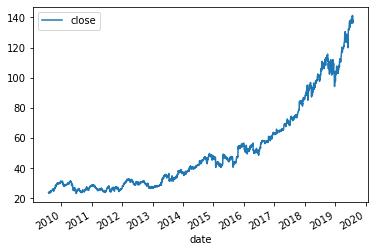

In [14]:
# Plot the daily closing stock price of the S&P 500 over the last 5 years
msft_pd.plot()

## 8. Calculate Daily Returns

In [17]:
# Calculate the daily return using the 'pct_change()' function
daily_returns = msft_pd.pct_change()
daily_returns.head()

,close
date,
2009-08-03,NaN
2009-08-04,-0.002518
2009-08-05,0.001683
2009-08-06,-0.014700
2009-08-07,0.004263


## 9. Plot Daily Returns

<AxesSubplot:xlabel='date'>

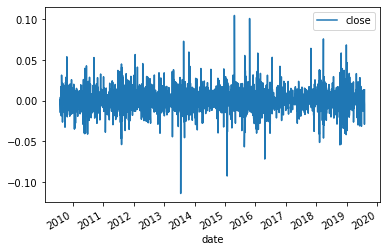

In [18]:
# Plot the daily returns of MSFT over the last 10 years
daily_returns.plot()

## 10. Calculate Cumulative Returns

In [19]:
# Calculate the cumulative returns using the 'cumprod()' function
cum_returns = (1 + daily_returns).cumprod() - 1
cum_returns

,close
date,
2009-08-03,NaN
2009-08-04,-0.002518
2009-08-05,-0.000839
2009-08-06,-0.015527
2009-08-07,-0.011330
...,...
2019-07-26,4.931179
2019-07-29,4.918170
2019-07-30,4.889635


## 11. Plot Cumulative Returns

<AxesSubplot:title={'center':'Cumulative Returns of MSFT over the Last 10 Years'}, xlabel='date'>

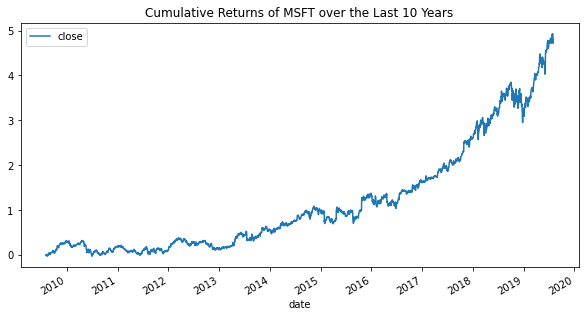

In [22]:
# Plot the daily returns of the S&P 500 over the last 5 years
cum_returns.plot(figsize = (10,5), title="Cumulative Returns of MSFT over the Last 10 Years")